<a href="https://colab.research.google.com/github/barbaracarnauba/repo_analise_dados_jogos_olimpicos/blob/main/Analise_Dados_120_Anos_de_Historia_das_Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=CC00CC> **Análise de Dados das Olímpiadas** </red>

Fontes dos datasets: 

https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

https://www.kaggle.com/berkayalan/2021-olympics-medals-in-tokyo



**Perguntas a serem respondidas com a análise dos dados**

1.   Qual o percentual de valores faltantes por feature?
2.   Quais as principais métricas das variáveis numéricas?
3.   Como se distribuem as features numéricas?
4.   Quais as correlações entre as features?
5.   Qual a distribuição de sexo por esporte?
6.   Quais os maiores medalhistas da história das olímpiadas?
7.   Quem ganhou mais medalhas de ouro?
8.   Quem ganhou mais medalhas em uma única olimpíada?
9.   Países com mais medalhas historicamente?
10.  Países com mais medalhas desde 1980?
11.  Corrida histórica de medalhas de 1896 a 2016
12.  Animação da corrida histórica de medalhas de 1896 a 2016
13.  Prevendo Vencedor de Medalha: Regressão Logística [Em construção]
14. Prevendo Vencedor de Medalha: Perceptron [Em construção]


**Importando bibliotecas**

In [741]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.animation as ani
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

**É garantido que o presente notebook execute adequadamente se as bibliotecas estiverem instaladas com as versões exibidas abaixo**

In [742]:
print("Versão Pandas: {}".format(pd.__version__))
print("Versão Numpy: {}".format(np.__version__))
print("Versão Matplotlib: {}".format(matplotlib.__version__))
print("Versão Seaborn: {}".format(sns.__version__))
print("Versão Scipy: {}".format(scipy.__version__))
print("Versão Sckit-Learn: {}".format(sklearn.__version__))

Versão Pandas: 1.1.5
Versão Numpy: 1.19.5
Versão Matplotlib: 3.2.2
Versão Seaborn: 0.11.1
Versão Scipy: 1.4.1
Versão Sckit-Learn: 0.22.2.post1


**Carregando os Datasets**

In [743]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [744]:
df_athlete_events = pd.read_csv('/content/drive/MyDrive/dataset_olimpiadas/athlete_events.csv')

In [745]:
df_medalhas_toquio_2021 = pd.read_csv('/content/drive/MyDrive/dataset_olimpiadas/Tokyo Medals 2021.csv')

**Visão geral sobre o dataset**

In [746]:
df_medalhas_toquio_2021.head(12)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
5,Australia,17,7,22,46,6
6,Netherlands,10,12,14,36,9
7,France,10,12,11,33,10
8,Germany,10,11,16,37,8
9,Italy,10,10,20,40,7


In [747]:
df_athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [748]:
df_athlete_events.shape

(271116, 15)

**Observação**

Há jogos olímpicos de inverso e de verão, como pode ser visto na coluna "Season" do dataset. Como nosso objetivo é apenas analisar os dados das olimpíadas de verão (no hemisfério norte). Filtraremos apenas os dados referentes a Season == 'Verão'

In [749]:
df_athlete_events['Season'].value_counts() # confirmando que só a duas possibilidades nesta coluna [Winter, Summer]

Summer    222552
Winter     48564
Name: Season, dtype: int64

In [750]:
filtra_verao = df_athlete_events['Season'] == 'Summer'
df_athlete_events=df_athlete_events[filtra_verao]

In [751]:
df_athlete_events.sort_values(by=['Age'])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze
252230,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 100 metres Breaststroke,NaN
79024,40129,Luigina Giavotti,F,11.0,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver
73461,37333,Carlos Bienvenido Front Barrera,M,11.0,NaN,NaN,Spain,ESP,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Eights,NaN
252231,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Breaststroke,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270679,135368,Antonio A. Zucchi,M,NaN,NaN,NaN,Argentina,ARG,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,NaN
270774,135416,Star Zulu,M,NaN,NaN,NaN,Zambia,ZAM,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Bantamweight,NaN
270793,135426,Max Zumstein,M,NaN,NaN,NaN,Switzerland,SUI,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,NaN
270804,135434,Edmundo Ziga Erraz,M,NaN,180.0,95.0,Chile,CHI,1948 Summer,1948,Summer,London,Athletics,Athletics Men's Hammer Throw,NaN


In [752]:
df_athlete_events.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

**Contando NaN por coluna no df**

In [753]:
df_athlete_events.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [754]:
df_athlete_events.isna().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
dtype: int64

In [755]:
rows_number = df_athlete_events.shape[0]
rows_number

222552

# 1. Qual o percentual de valores faltantes por feature?

In [756]:
serie = df_athlete_events.isna().sum()
percent_nan_age = round((serie['Age']/rows_number)*100,2)
percent_nan_age

4.13

In [757]:
percent_nan_altura = round((serie['Height']/rows_number)*100,2)
percent_nan_altura

23.3

In [758]:
percent_nan_peso = round((serie['Weight']/rows_number)*100,2)
percent_nan_peso

24.2

In [759]:
percent_nan_medal = round((serie['Medal']/rows_number)*100,2)
percent_nan_medal

84.68

**Observação**

Analisando o percentual de dados faltantes (NaN) nas features, é razoável que haja 3,49% de de NaN na feature Age, 22,19% na feature Height e 23,19% na feature Weight. No entanto, não é razoável que haja 85,33% NaN na feature Medal. A hipótese aqui assumida é que esses NaN são na verdade os participantes que não ganharam medalha. Por isso, vamos preencher tais NaN com a string "No Medal".

**Subtituindo NaN na coluna 'Medal' por 'No Medal'**

In [760]:
df_athlete_events['Medal'].fillna('No Medal', inplace=True)

**Confirmando se a substituição foi realizada**

In [761]:
df_athlete_events.isna().sum()

ID            0
Name          0
Sex           0
Age        9189
Height    51857
Weight    53854
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

# 2. Quais as principais métricas das variáveis numéricas?

In [762]:
df_numerico = df_athlete_events[['Age', 'Height', 'Weight']]
df_numerico.describe() # obs: não são considerados os NaN

,Age,Height,Weight
count,213363.000000,170695.000000,168698.00000
mean,25.674053,175.515551,70.68906
std,6.699839,10.914725,14.80394
min,10.000000,127.000000,25.00000
25%,21.000000,168.000000,60.00000
50%,24.000000,175.000000,70.00000
75%,28.000000,183.000000,79.00000
max,97.000000,226.000000,214.00000


**Dados esquisitos**

Atleta mais velho com 97? Segunda o wikipedia o John Quincy Adams Ward competiu postumamente, tendo falecido aos 80 anos em 1910.

Isto é uma alerta para não acreditar totalmente nos dados, pois podem haver mais equívocos como esse.

In [763]:
filtro_mais_velho = df_athlete_events['Age'] == 97.0
df_athlete_events[filtro_mais_velho]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",No Medal


**Olimpíadas no Brasil 2016**

In [764]:
filtro_2016 = df_athlete_events['Year'] == 2016
df_athlete_events[filtro_2016].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,No Medal
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,No Medal
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,No Medal
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,No Medal
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,No Medal


**Michael Phelps**

In [765]:
filtro_phelps = df_athlete_events['Name'] == 'Michael Fred Phelps, II'
df_athlete_events[filtro_phelps].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
187887,94406,"Michael Fred Phelps, II",M,15.0,193.0,91.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,No Medal
187888,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,Bronze
187889,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
187890,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold
187891,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Butterfly,Gold


**Modas da Idade, Altura e Peso**

In [766]:
idade = df_numerico['Age'].dropna()
stats.mode(idade)

ModeResult(mode=array([23.]), count=array([17521]))

In [767]:
altura = df_numerico['Height'].dropna()
stats.mode(altura)

ModeResult(mode=array([170.]), count=array([9696]))

In [768]:
peso = df_numerico['Weight'].dropna()
stats.mode(peso)

ModeResult(mode=array([70.]), count=array([7659]))

# Como se distribuem as features numéricas? Histogramas (Densidade de Probablidade)

Histogramas são recomendados para variáveis numéricas, tem relação com a função densidade de probabilidade

In [769]:
print('***********Idade***********')
print('skewness: ', stats.skew(idade))
print('kurtosis: ', stats.kurtosis(idade))
print('***********Altura***********')
print('skewness: ',stats.skew(altura))
print('kurtosis: ', stats.kurtosis(altura))
print('***********Peso***********')
print('skewness: ', stats.skew(peso))
print('kurtosis: ', stats.kurtosis(peso))


***********Idade***********
skewness:  1.7741921796321827
kurtosis:  6.062101977184664
***********Altura***********
skewness:  0.019154885937302486
kurtosis:  0.1354363080733143
***********Peso***********
skewness:  0.8464250261851799
kurtosis:  2.1521574363717164


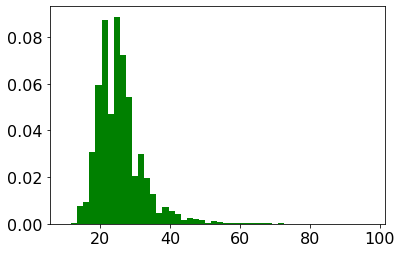

In [770]:
hist_idade =  plt.hist(idade, bins=50, density=True, facecolor='g')

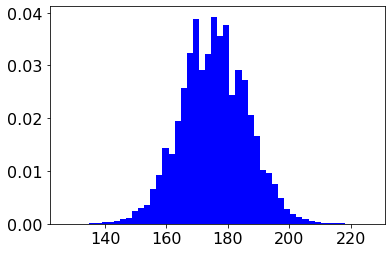

In [771]:
hist_altura =  plt.hist(altura, bins=50, density=True, facecolor='b')

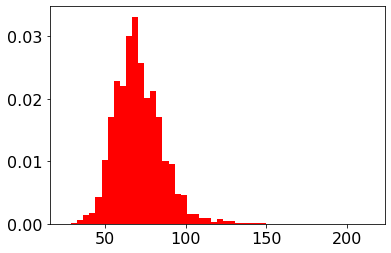

In [772]:
hist_peso =  plt.hist(peso, bins=50, density=True, facecolor='r')

# 4. Correlações

In [773]:
filtro_medalhas = df_athlete_events['Medal'].str.contains("Gold|Silver|Bronze")
df_medalhistas = df_athlete_events[filtro_medalhas]
df_medalhistas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


Procurando relação entre altura e medalha na ginástica e na natação

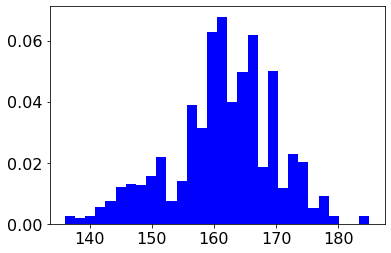

In [774]:
filtro_ginastica = df_medalhistas['Sport'] == 'Gymnastics'
df_ginastica = df_medalhistas[filtro_ginastica]
hist_altura_gim =  plt.hist(df_ginastica['Height'].dropna(), bins=30, density=True, facecolor='b')

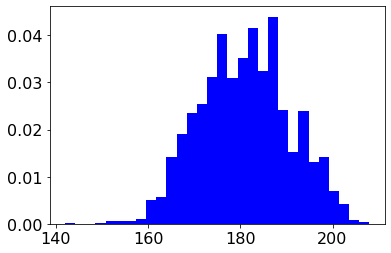

In [775]:
filtro_natacao = df_medalhistas['Sport'] == 'Swimming'
df_natacao = df_medalhistas[filtro_natacao]
hist_altura_nat =  plt.hist(df_natacao['Height'].dropna(), bins=30, density=True, facecolor='b')

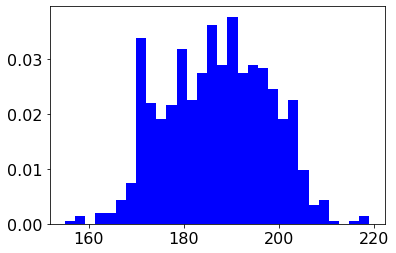

In [776]:
filtro_volei= df_medalhistas['Sport'] == 'Volleyball'
df_volei = df_medalhistas[filtro_volei]
hist_altura_volei =  plt.hist(df_volei['Height'].dropna(), bins=30, density=True, facecolor='b')

É bem interessante observar a distribuição da altura dos atletas para cada cateogia do esporte. Olhando paras os atletas vencedores de medalha de ginástica, natação e volei, foi observado o esperado: concetração de atletas muito altos no vôlei, altos na natação e baixos/média estatura na ginástica.

# 5. Qual a distribuição de sexo por esporte (top 10)?

In [777]:
df_athlete_events['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [778]:
def plot_bar_cores(xval,yval,dados,ylab,xlab,titulo):  
    """
    Função para plotar gráfico de barras a partir de colunas de dataframes e
    colore de vermelho a coluna de maior valor, de azul a de menor valor e de 
    cinza as demais colunas.
    
    Parâmetros:
    xval (string) : coluna do dataframe que será o eixo x
    yval  (string) : coluna do dataframe que será o eixo y
    dados (dataframe) : dataframe que é a base dos dados de xval e yval
    ylab (string) : rótulo do eixo y
    xlab (string) : rótulo do eixo x
    titulo (string) : titulo do grafico    
    """   
    cores= ['red' if (y == dados[yval].max()) else
             'blue' if (y == dados[yval].min()) else 
             'grey' for y in dados[yval] ]      
    plt.figure()
    sns.barplot(x = xval, y = yval, data = dados, palette= cores ,ci=None)
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [779]:
def filtra_esporte_por_sexo(df,sex):
  filtro = df['Sex'] == sex
  df_top10_FSports=df[filtro]['Sport'].value_counts()[0:10] # top 10 
  df_top10_FSports=df_top10_FSports.to_frame()
  df_top10_FSports['index'] = df_top10_FSports.index
  df_top10_FSports.rename({'Sport': 'Counts', 'index': 'Esporte'}, axis=1, inplace=True)
  return df_top10_FSports

In [780]:
df_sport_F=filtra_esporte_por_sexo(df_athlete_events,'F')

In [781]:
df_sport_M=filtra_esporte_por_sexo(df_athlete_events,'M')

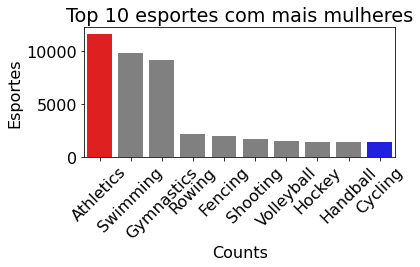

In [782]:
plot_bar_cores('Esporte','Counts',df_sport_F,'Esportes','Counts','Top 10 esportes com mais mulheres')

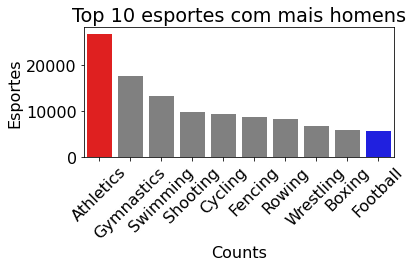

In [783]:
plot_bar_cores('Esporte','Counts',df_sport_M,'Esportes','Counts','Top 10 esportes com mais homens')

# 6. Quais os maiores medalhistas da história das olímpiadas?

In [784]:
df_athlete_events['Medal'].value_counts()

No Medal    188464
Gold         11459
Bronze       11409
Silver       11220
Name: Medal, dtype: int64

In [785]:
def top10_winner_athlete(df, feature, string):
  filtro = df[feature].str.contains(string)
  df_ouros = df[filtro]
  df_top10=df_ouros[['Name','Sport',feature]].value_counts().to_frame()
  df_top10.rename({0: 'Counts'}, axis=1, inplace=True)
  df_top10.reset_index(inplace=True)
  df_top10 = df_top10[0:10] # top 10 maiores ganhadores
  return df_top10

**Filtrando Linhas onde o atleta estava no podium (ouro, prata ou bronze)**

In [786]:
filtro_medalhas = df_athlete_events['Medal'].str.contains("Gold|Silver|Bronze")
df_medalhistas = df_athlete_events[filtro_medalhas]
df_medalhistas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


In [787]:
lista = ['Yes' for i in range(df_medalhistas.shape[0])]
df_medalhistas['Podium'] = lista
df_medalhistas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Podium
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Yes
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Yes
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Yes
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Yes
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Yes


In [788]:
df_quantas_medalhas = top10_winner_athlete(df_medalhistas, 'Podium', 'Yes')
df_quantas_medalhas

,Name,Sport,Podium,Counts
0,"Michael Fred Phelps, II",Swimming,Yes,28
1,Larysa Semenivna Latynina (Diriy-),Gymnastics,Yes,18
2,Nikolay Yefimovich Andrianov,Gymnastics,Yes,15
3,Borys Anfiyanovych Shakhlin,Gymnastics,Yes,13
4,Takashi Ono,Gymnastics,Yes,13
5,Edoardo Mangiarotti,Fencing,Yes,13
6,"Dara Grace Torres (-Hoffman, -Minas)",Swimming,Yes,12
7,Birgit Fischer-Schmidt,Canoeing,Yes,12
8,Natalie Anne Coughlin (-Hall),Swimming,Yes,12
9,Paavo Johannes Nurmi,Athletics,Yes,12


Foi confirmado por pesquisa rápida no Google que Michael Phelps é o maior ganhador de medalhas em olimpíadas de todos os tempos

Larysa Semenivna também foi confirmada.

# 7. Quem ganhou mais medalhas de ouro?

In [789]:
df_quantos_ouros = top10_winner_athlete(df_athlete_events,'Medal','Gold')
df_quantos_ouros

,Name,Sport,Medal,Counts
0,"Michael Fred Phelps, II",Swimming,Gold,23
1,"Raymond Clarence ""Ray"" Ewry",Athletics,Gold,10
2,Larysa Semenivna Latynina (Diriy-),Gymnastics,Gold,9
3,Mark Andrew Spitz,Swimming,Gold,9
4,"Frederick Carlton ""Carl"" Lewis",Athletics,Gold,9
5,Paavo Johannes Nurmi,Athletics,Gold,9
6,"Matthew Nicholas ""Matt"" Biondi",Swimming,Gold,8
7,Sawao Kato,Gymnastics,Gold,8
8,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,Gold,8
9,Usain St. Leo Bolt,Athletics,Gold,8


# 8. Quem ganhou mais medalhas em um única olimpíada

In [790]:
df_medalhistas[['Name','Year']].value_counts()[0:10] # Aleksandr e Phelps confirmados como os maiores vencedores

Name                             Year
Aleksandr Nikolayevich Dityatin  1980    8
Michael Fred Phelps, II          2008    8
                                 2004    8
Borys Anfiyanovych Shakhlin      1960    7
Lloyd Spencer Spooner            1920    7
Mariya Kindrativna Horokhovska   1952    7
Willis Augustus Lee, Jr.         1920    7
Mikhail Yakovlevich Voronin      1968    7
Mark Andrew Spitz                1972    7
Nikolay Yefimovich Andrianov     1976    7
dtype: int64

# 9. País com mais medalhas historicamente?

Um problema que existe de contabilizar as medalhas por país e não por atleta é a existência de esportes praticados em equipe, como o futebol, o vôlei, o basquete etc. A solução para isso é criar um subconjunto do dataset de medalhista sem as colunas ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight'], pois são essas colunas que caracterizam os atletas. Assim, com o novo dataset sem as colunas mencionadas, teremos dados duplicados para atletas que ganharam medalha em equipe. Ao remover as duplicatas, e somarmos as medalhas por país ao longo da história, estaremos com a contagem correta de medalhas por país.

In [791]:
df_medalhistas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Podium
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Yes
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Yes
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Yes
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Yes
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Yes


In [792]:
colunas = list(df_medalhistas.columns)

In [793]:
df_medalhistas_por_pais = df_medalhistas[colunas[6::]]
df_medalhistas_por_pais.shape

(34088, 10)

In [794]:
df_medalhistas_por_pais.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [795]:
df_medalhistas_por_pais.shape

(16074, 10)

In [796]:
df_medalhistas_por_pais['Team'].value_counts()[0:10]

United States    2459
Soviet Union     1004
Great Britain     805
Germany           753
France            713
Italy             596
Hungary           504
China             503
Australia         499
Sweden            486
Name: Team, dtype: int64

# 10. Países com mais medalhas desde 1980?

In [797]:
filtro_apartir1980 = df_medalhistas_por_pais['Year'] >= 1980
df_medalhistas_por_pais[filtro_apartir1980]['Team'].value_counts()[0:10]

United States    983
China            503
Russia           450
Germany          373
Great Britain    351
Australia        331
Soviet Union     326
France           308
Italy            263
Japan            239
Name: Team, dtype: int64

# 11. Corrida histórica de medalhas de 1896 a 2016

In [798]:
def serie_temporal_medalhas_por_pais(df, nome_pais):

  filtro_pais = df['Team'] == nome_pais
  df_medalhistas_pais = df[filtro_pais].sort_values(by='Year')[['Year', 'Podium']]
  df_medalhistas_pais['Podium'] = 1
  df_medalhas_pais= df_medalhistas_pais.groupby(['Year']).sum().reset_index()
  return df_medalhas_pais

In [799]:
df_medalhas_eua = serie_temporal_medalhas_por_pais(df_medalhistas_por_pais, 'United States')
df_medalhas_china = serie_temporal_medalhas_por_pais(df_medalhistas_por_pais, 'China')
df_medalhas_uniaosovietica = serie_temporal_medalhas_por_pais(df_medalhistas_por_pais, 'Soviet Union')
df_medalhas_russia = serie_temporal_medalhas_por_pais(df_medalhistas_por_pais, 'Russia')
df_medalhas_grabretanha = serie_temporal_medalhas_por_pais(df_medalhistas_por_pais, 'Great Britain')
df_medalhas_italia = serie_temporal_medalhas_por_pais(df_medalhistas_por_pais, 'Italy')
df_medalhas_brasil = serie_temporal_medalhas_por_pais(df_medalhistas_por_pais, 'Brazil')

In [800]:
plt.rcParams.update({'font.size': 16})

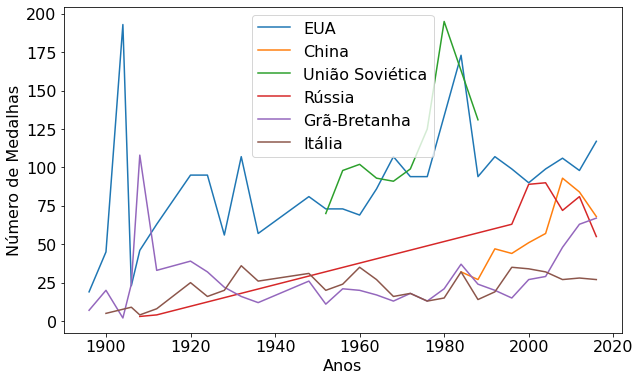

In [801]:
plt.figure(figsize=(10,6))
plt.plot(df_medalhas_eua['Year'],df_medalhas_eua['Podium'],label='EUA')
plt.plot(df_medalhas_china['Year'],df_medalhas_china['Podium'], label='China')
plt.plot(df_medalhas_uniaosovietica['Year'],df_medalhas_uniaosovietica['Podium'],label='União Soviética')
plt.plot(df_medalhas_russia['Year'],df_medalhas_russia['Podium'], label='Rússia')
plt.plot(df_medalhas_grabretanha['Year'],df_medalhas_grabretanha['Podium'], label='Grã-Bretanha')
plt.plot(df_medalhas_italia['Year'],df_medalhas_italia['Podium'], label='Itália')
plt.xlabel('Anos')
plt.ylabel('Número de Medalhas')
plt.legend()
plt.show()

# Animação da Corrida Histórica de Medalhas de 1896-2016

**Passo 1: Reorganizar dados dos países escolhidos para animação em um único dataset**

In [802]:
np.array(df_medalhas_eua['Year']) # total de anos que os eua participou de olimpiada

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012, 2016])

In [803]:
np.array(df_medalhas_grabretanha['Year']) # total de anos que a gra bretanha participou de olimpiada

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1996, 2000, 2004, 2008, 2012, 2016])

In [804]:
len(df_athlete_events['Year'].unique()) # total de anos das olimpiadas 

29

In [805]:
def conta_medalhas_pais_todos_anos(df, df_pais, nome_pais):

  lista_anos = list(df['Year'].unique())
  lista_anos = sorted(lista_anos)
  df_novo = df_pais.copy()

  for i in range(len(lista_anos)):
    if not lista_anos[i] in list(df_pais['Year']):    
      df_novo.loc[len(lista_anos)+i] = np.array([lista_anos[i],0])

  df_novo.sort_values(by=['Year'], inplace= True)
  df_novo = df_novo.reset_index(drop=True)
  df_novo = df_novo.rename(columns={"Podium": nome_pais})

  return df_novo

In [806]:
italy = conta_medalhas_pais_todos_anos(df_medalhistas_por_pais, df_medalhas_italia,'Italy')
grabretanha = conta_medalhas_pais_todos_anos(df_medalhistas_por_pais, df_medalhas_grabretanha,'G Britain')
russia = conta_medalhas_pais_todos_anos(df_medalhistas_por_pais, df_medalhas_russia,'Russia')
eua = conta_medalhas_pais_todos_anos(df_medalhistas_por_pais, df_medalhas_eua,'U States')
china = conta_medalhas_pais_todos_anos(df_medalhistas_por_pais, df_medalhas_china,'China')
brasil = conta_medalhas_pais_todos_anos(df_medalhistas_por_pais, df_medalhas_brasil,'Brazil')
uniaosovietica = conta_medalhas_pais_todos_anos(df_medalhistas_por_pais, df_medalhas_uniaosovietica,'S Union')

In [807]:
lst_paises_concat = [eua, 
                     russia['Russia'], 
                     italy['Italy'], 
                     grabretanha['G Britain'], 
                     china['China'],
                     brasil['Brazil'],
                     uniaosovietica['S Union']]

result = pd.concat(lst_paises_concat, axis =1)
result.set_index('Year', inplace=True)
result.index = pd.to_datetime(result.index, format='%Y')
result


,U States,Russia,Italy,G Britain,China,Brazil,S Union
Year,,,,,,,
1896-01-01,19,0,0,7,0,0,0
1900-01-01,45,0,5,20,0,0,0
1904-01-01,193,0,0,2,0,0,0
1906-01-01,23,0,9,24,0,0,0
1908-01-01,46,3,4,108,0,0,0
1912-01-01,63,4,8,33,0,0,0
1920-01-01,95,0,25,39,0,3,0
1924-01-01,95,0,16,32,0,0,0
1928-01-01,56,0,20,22,0,0,0


**Soma cumulativa das medalhas dos paises**

In [808]:
result2 = result.copy()
for col in list(result2.columns):
  result2[col] = result2[col].cumsum()

result2

,U States,Russia,Italy,G Britain,China,Brazil,S Union
Year,,,,,,,
1896-01-01,19,0,0,7,0,0,0
1900-01-01,64,0,5,27,0,0,0
1904-01-01,257,0,5,29,0,0,0
1906-01-01,280,0,14,53,0,0,0
1908-01-01,326,3,18,161,0,0,0
1912-01-01,389,7,26,194,0,0,0
1920-01-01,484,7,51,233,0,3,0
1924-01-01,579,7,67,265,0,3,0
1928-01-01,635,7,87,287,0,3,0


**Animação**

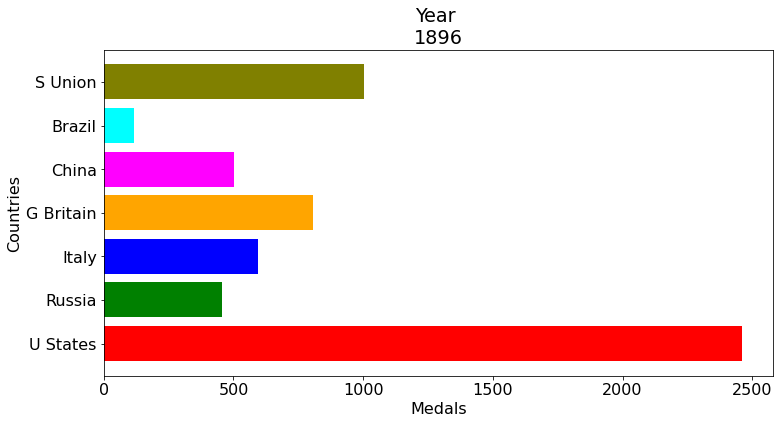

In [809]:
from IPython.display import HTML

fig = plt.figure(figsize=(12,6))

def drawframe(i=int):
    iv = min(i, len(result2.index)-1) #the loop iterates an extra one time, which causes the dataframes to go out of bounds. This was the easiest (most lazy) way to solve this :)
    objects = result2.max().index
    y_pos = np.arange(len(objects))
    performance = result2.iloc[[iv]].values.tolist()[0]
    plt.barh(y_pos, performance, align='center', color=['red', 'green', 'blue', 'orange','magenta','cyan','olive'])
    plt.yticks(y_pos, objects)
    plt.xlabel('Medals')
    plt.ylabel('Countries')
    plt.title('Year \n' + str(result2.index[iv].strftime('%Y')))
    #plt.tight_layout()

anim = ani.FuncAnimation(fig, drawframe, interval=500)
HTML(anim.to_html5_video())

# 13. Prevendo Vencedor de Medalha: Regressão Logística

In [810]:
df_athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal


In [811]:
df_numerico.head()

,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
2,24.0,NaN,NaN
3,34.0,NaN,NaN
26,18.0,168.0,NaN


In [812]:
cols_numeric = list(df_numerico.columns)

for col in cols_numeric:
  media_col = (df_athlete_events[col].mean())
  df_athlete_events[col] = df_athlete_events[col].fillna(media_col)

In [813]:
df_athlete_events.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [814]:
df_cat_to_num = df_athlete_events.replace(['Gold', 'Silver', 'Bronze', 'No Medal'], 
                     [3, 2, 1, 0])
df_cat_to_num.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.00000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.000000,60.00000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.515551,70.68906,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.515551,70.68906,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,70.68906,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,0


In [815]:
df_athlete_events['Medal'].value_counts()

No Medal    188464
Gold         11459
Bronze       11409
Silver       11220
Name: Medal, dtype: int64

In [816]:
df_cat_to_num.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal       int64
dtype: object

In [817]:
df_cat_to_num2 = df_cat_to_num.replace([1,2,3],[1,1,1])

In [818]:
df_cat_to_num2['Medal'].unique()

array([0, 1])

In [819]:
countries = list(df_cat_to_num2['NOC'].unique())
countries_cat = list(range(len(countries)))
df_cat_to_num2 = df_cat_to_num2.replace(countries, countries_cat)

In [820]:
cities = list(df_cat_to_num2['City'].unique())
countries_cat = list(range(len(countries)))
df_cat_to_num2 = df_cat_to_num2.replace(countries, countries_cat)

In [821]:
cities = list(df_cat_to_num2['City'].unique())
cities_cat = list(range(len(cities)))
df_cat_to_num2 = df_cat_to_num2.replace(cities,cities_cat)

In [822]:
df_cat_to_num2.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC         int64
Games      object
Year        int64
Season     object
City        int64
Sport      object
Event      object
Medal       int64
dtype: object

In [823]:
df_cat_to_num2['Sport']

0         Basketball
1               Judo
2           Football
3         Tug-Of-War
26         Athletics
             ...    
271106        Hockey
271107      Football
271108        Rowing
271109        Rowing
271110    Basketball
Name: Sport, Length: 222552, dtype: object

In [824]:
df_cat_to_num2_natacao = df_cat_to_num2[df_cat_to_num2['Sport'] == 'Swimming']

Organizando Target (y) e Features (x)


In [825]:
features = ['Height','Weight','Age','NOC','City']
y = df_cat_to_num2_natacao['Medal']
x = df_cat_to_num2_natacao[features]

Setando Seed para garantir repetibilidade dos resultados

In [826]:
seed = 42

In [827]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= seed)

In [828]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [829]:
clf.score(X_train, y_train)

0.8693145074369476

In [830]:
y_pred = clf.predict(X_test)

In [831]:
clf.score(X_test, y_test)

0.8657038154774735

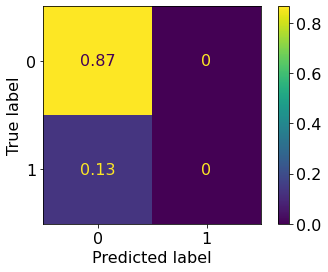

In [832]:
plot_confusion_matrix(clf, X_test, y_test , normalize= 'all')

In [833]:
confusion_matrix(y_test, y_pred, normalize='all')

array([[0.86570382, 0.        ],
       [0.13429618, 0.        ]])

Por enquanto, a regressão logística não se mostrou eficaz, por isso, a próxima tentativa de predição de vencedores será através do modelo Perceptron

# 14. Prevendo Vencedor de Medalha: Perceptron

In [834]:
from sklearn.linear_model import Perceptron

In [835]:
clf2 = Perceptron(tol=1e-3, random_state=seed)

In [836]:
clf2.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [837]:
clf2.score(X_train, y_train)

0.868182798016814

In [838]:
y_pred2 = clf2.predict(X_test)

In [839]:
clf2.score(X_test, y_test)

0.8641948695839621

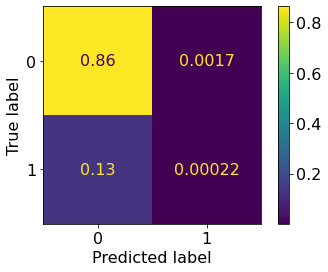

In [840]:
plot_confusion_matrix(clf2, X_test, y_test , normalize= 'all')

O Perceptron também não conseguiu realizar predições. Aparentemente o problema é que tempos poucos target 1 (ganhador de medalha) e muitos target 0 (não ganhador de medalha) o que faz com que o classificador classifica 100%, 99,9 % dos valores de teste como 0.

Ver: https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0

# Referências

*   https://docs.scipy.org/doc/scipy/reference/stats.html
*   https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
*   https://olympics.com/ioc/faq/history-and-origin-of-the-games/since-when-have-the-summer-and-winter-games-no-longer-been-held-in-the-same-year
*   https://towardsdatascience.com/learn-how-to-create-animated-graphs-in-python-fce780421afe
*   https://matplotlib.org/stable/gallery/color/named_colors.html
*   https://www.unm.edu/~tbeach/IT145/color.html
*   https://olimpiadas.uol.com.br/quadro-de-medalhas/historico/
